In [1]:
from notebook.services.config import ConfigManager
ConfigManager().update('livereveal', {
              'width': 1600,
              'height': 900,
             'theme': 'sky2'
})

{'height': 900, 'theme': 'sky2', 'width': 1600}

# Use Neural Network



### 2016/08/26 tjw at NCCU Deep Learning Hackathon




In [2]:
%pylab inline
figsize(15,10);

Populating the interactive namespace from numpy and matplotlib


# Neural Network
# From $1$ to $2$

## From 0 to 1
* Set up environment
* MNIST tutorial
<img src="Samples-from-the-MNIST-database.png" width="90%" />

## Supervised Learning

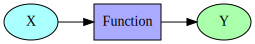

In [3]:
from  pydot_ng import Node, Edge, Dot
from IPython.display import Image, SVG, HTML, IFrame
def make_graph(name, nodes, edges, **kwargs):
    graph= Dot('supervised', graph_type='digraph', rankdir='LR', bgcolor='transparent')
    for node in nodes:
        graph.add_node(node)
    for edge in edges:
        if isinstance(edge, tuple):
            edge = Edge(*edge)
        graph.add_edge(edge)
    graph.write_svg(name+'.svg')
    return SVG(graph.create_svg())

def C(n, s='box', c='white', label=None):
    if label is None:
        label=n
    return Node(n, label=label, shape=s, style='filled', fillcolor='"%s"'%c)

nodes = [C('X', 'oval', '#aaffff'), 
         C('f', 'box', '#aaaaff', label='Function'), 
         C('Y', 'oval', '#aaffaa'),]
edges = [('X', 'f'), ('f', 'Y')]
    

make_graph('supervised', nodes, edges, graph_type='digraph', rankdir='LR', bgcolor='transparent')


<img src='./supervised.svg' width='90%' />

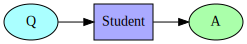

In [4]:

nodes = [C('Q', 'oval', '#aaffff'), 
         C('f', 'box', '#aaaaff', label='Student'), 
         C('A', 'oval', '#aaffaa'),]
edges = [('Q', 'f'), ('f', 'A')]
    

make_graph('supervised2', nodes, edges, graph_type='digraph', rankdir='LR', bgcolor='transparent')

<img src='./supervised2.svg' width='90%' />


> I see you as a human being. I will educate you well.


> --Ma Ying-jeou

# Empathy: You were a student too


## Learning is all about generalization
* 1,2,3,4,?, ?
* 1, 49, 100, 784, 1444, ?, 3364

* Training material
* Grading/score
* Training method
* Test 

## Font
<img src="font.jpg" width="75%" />

## Waifu2x
<img src="waifu2x.png" width="75%" />
CC-BY-NC "For Creators", http://piapro.net/en_for_creators.html

In [5]:
IFrame("https://tjwei.github.io/2048-NN", "90%", 800)

## Tools
* Theano/lasagne
* Keras
* Tensorflow/tflearn
* neon
* torch
* caffe


# There are plenty of low hanging fruits

# End of the story?

## Issues (From $2$ to $\infty$)
* Q without A
* Not enough samples
* How to encode the problem?
* Cutting edge result


## Researching direction
e.g.  https://openai.com/blog/generative-models/

# Issues (From $1$ to $2$I)

## My model is not learning

# Feedforward Neural Network

<img src="https://camo.githubusercontent.com/30a00ccdd6837573f5cb2571af6d42ce19d41097/687474703a2f2f692e696d6775722e636f6d2f486466656e74422e706e67" />

In [6]:
from lasagne.layers import *
from lasagne.nonlinearities import *
import lavis
def draw(l, output_shape=False, rankdir="TB"):
    return lavis.draw_to_notebook(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
def draw_to_file(name, l, output_shape=False, rankdir="TB"):
    dot = lavis.get_pydot_graph(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
    dot.write_svg(name+".svg")

In [7]:
l_in = InputLayer(shape=(None, 2))
l_hidden = DenseLayer(l_in, num_units=3)
l_out = DenseLayer(l_hidden, num_units=1, nonlinearity=sigmoid)

In [8]:
draw_to_file("simple_network", l_out, True, "LR")

<div class="zoom_img">
<img src="simple_network.svg" width="90%" />
</div>

### $$ Wx+b $$

## Sigmoid
$$ \frac{1}{1 + e^{-x}} $$

In [9]:
x=linspace(-5,5, 1001)

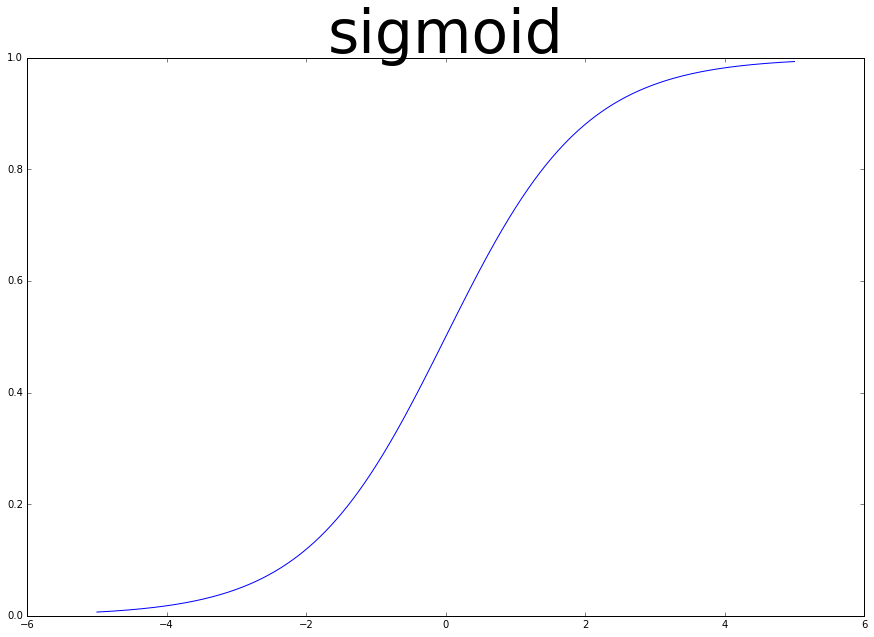

In [19]:
plot(x, 1 / (1 + exp(-x)));
title('sigmoid', fontsize=60)
savefig("sigmoid.png")

## Relu (rectify)

$$  max ( 0 , x )  $$


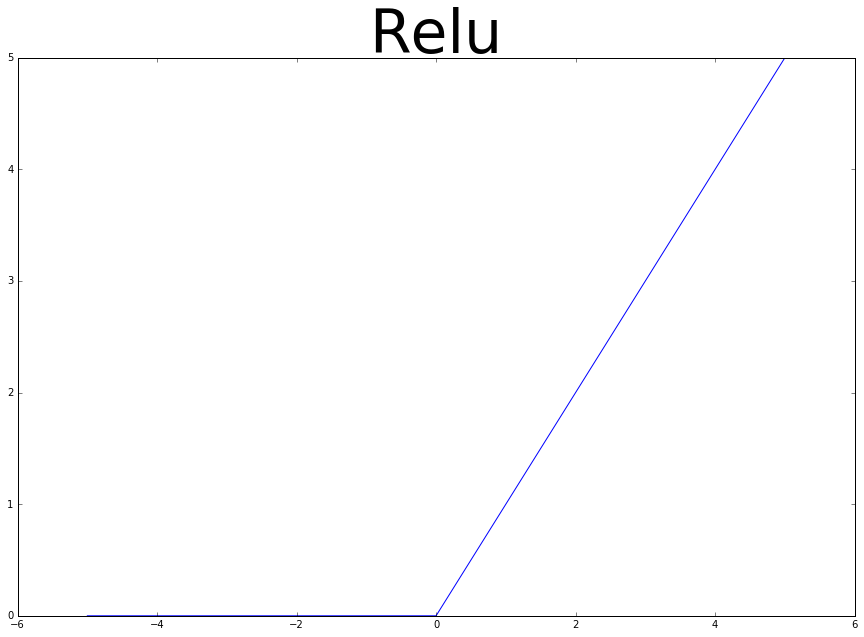

In [20]:
plot(x, maximum(0, x));
title("Relu", fontsize=60)
savefig("relu.png")

## tanh
$$ \frac{e^{2x}-1}{e^{2x}+1} $$


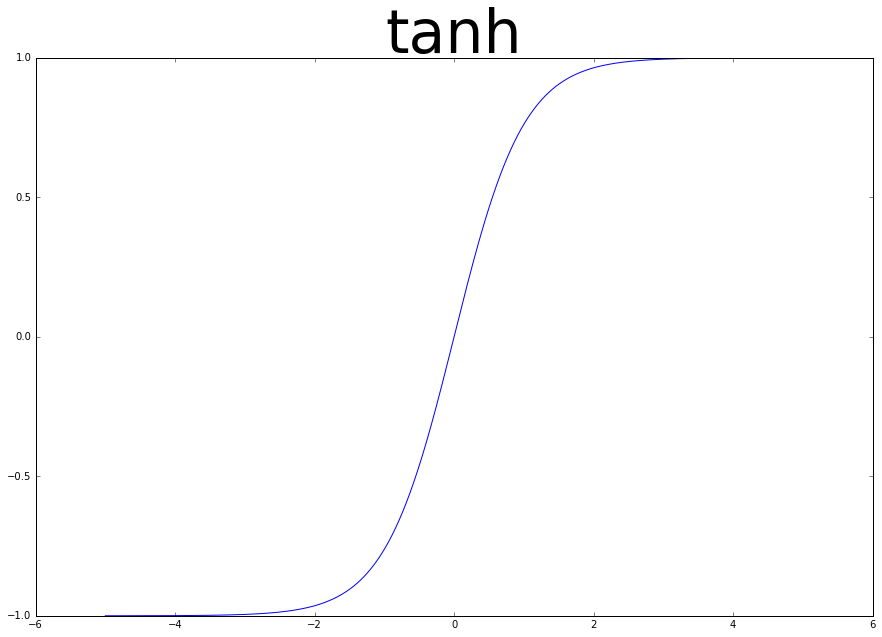

In [21]:
plot(x, (exp(2*x)-1)/(exp(2*x)+1));
title("tanh", fontsize=60)
savefig("tanh.png")

## Activation function
<div class="zoom_img" style="align: center">
<br />
<img src="sigmoid.png" width=400 />
<img src="relu.png" width=400 />
<img src="tanh.png" width=400 />
</div>

# Use it



> "If you have one, try to use it please!" 


>   --Dr. Gregory House 


* Encoding the problem
  * fixed length
  * discrete -> one hot
  * range
* Logic complexity 
* Number of features? 

## CNN 
* Convolution (correlation)
* Kernel
* Pool


> Love thy neighbor

* Start with simple network (e.g. one hidden layer)
    * try CNN for suitable input data
* Use relu all layers except the top one
* Use adam or sgd(with momentum)
    * default setting usually works fine    
* preprocessing
* When overfitting, try:
    * dropout
    * weight decay
    * batch normalization

## Using hidden layers

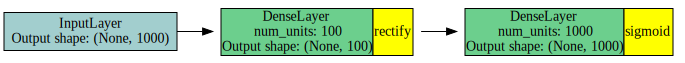

In [22]:
l_in = InputLayer(shape=(None, 1000))
l_hidden = DenseLayer(l_in, num_units=100)
l_out = DenseLayer(l_hidden, num_units=1000, nonlinearity=sigmoid)
draw_to_file("autoencoder", l_out, True, "LR")
draw(l_out, True, "LR")

<div class="zoom_img">
<img src="autoencoder.svg" width="90%" />
</div>

## Neural Matching
https://github.com/tjwei/Neural-Matching/blob/master/matching-theano-VGG-one-patch.ipynb

## Generative Adversarial Networks

> What I cannot create, I do not understand.


>   --Richard Feynman

# Educate your NN




> Education is the most powerful weapon which you can use to change the world. 


>   --Nelson Mandela

# Overfitting

## Data

In [23]:
x = linspace(-5, 5, 20)
x0 = linspace(-5, 5, 100)
error = 10*random.rand(x.shape[0])-5

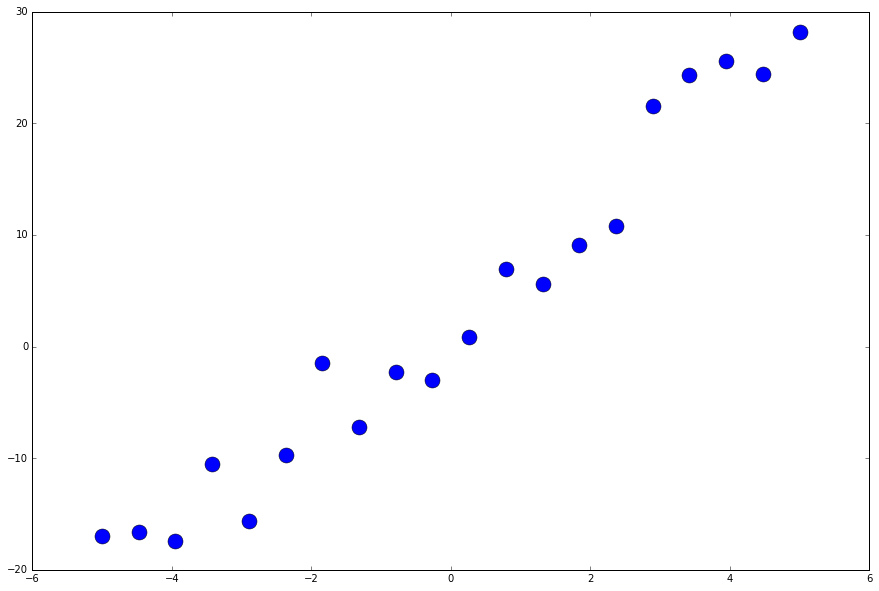

In [28]:
y = 5*x+3+error
plot(x, y, 'o', markersize=15);

## linear fit

In [29]:
w=polyfit(x,y,1)
p1=poly1d(w)

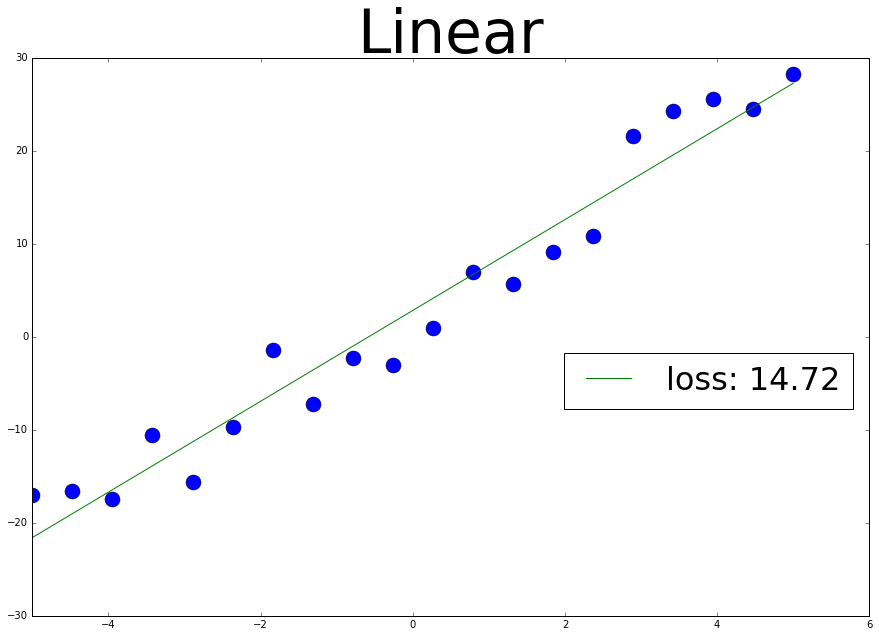

In [56]:
label1 = "loss: %.2f"%norm(y-p1(x))
plot(x, y, 'o',  markersize=15);
plot(x0, p1(x0), label=label1);
norm(y-p1(x))
title("Linear", fontsize=60)
legend(bbox_to_anchor=(1, 0.5), fontsize=32);
plt.axis([-5, 6, -30, 30])
savefig("p1.png")

## Quadratic fit

In [34]:
w=polyfit(x,y,2)
p2=poly1d(w)

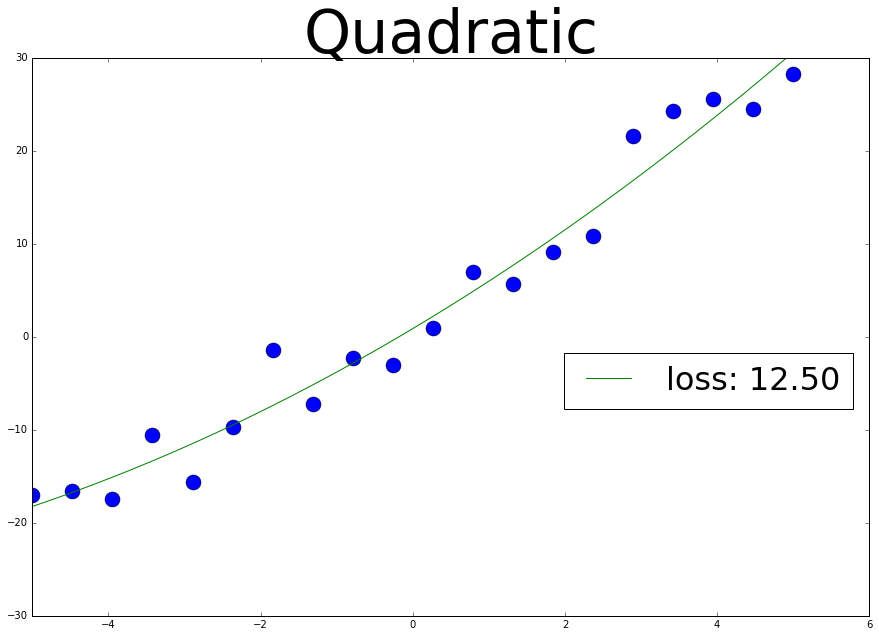

In [55]:
label2 = "loss: %.2f"%norm(y-p2(x))
plot(x, y, 'o', markersize=15);
plot(x0, p2(x0), label=label2);
norm(y-p2(x))
title('Quadratic', fontsize=60)
legend(bbox_to_anchor=(1, 0.5), fontsize=32);
plt.axis([-5, 6, -30, 30])
savefig("p2.png")

## d=5 fit

In [43]:
w=polyfit(x,y,5)
p5=poly1d(w)

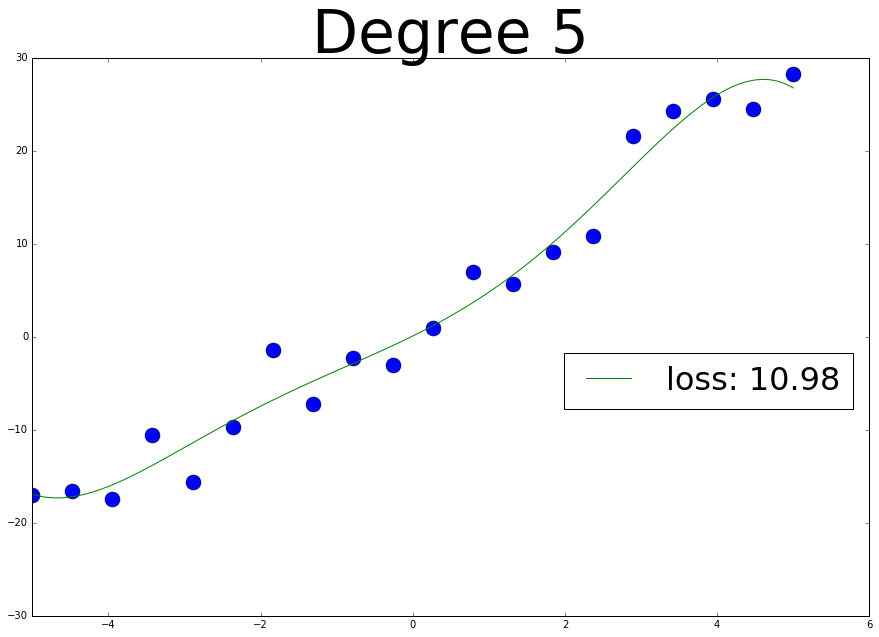

In [54]:
label5 = "loss: %.2f"%norm(y-p5(x))
plot(x, y, 'o', markersize=15);
plot(x0, p5(x0), label=label5);
norm(y-p5(x))
title("Degree 5", fontsize=60)
plt.axis([-5, 6, -30, 30])
legend(bbox_to_anchor=(1, 0.5), fontsize=32);
savefig("p5.png")

## d=20 fit

In [46]:
w=polyfit(x,y,20, rcond=1e-30)
p20=poly1d(w)

/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


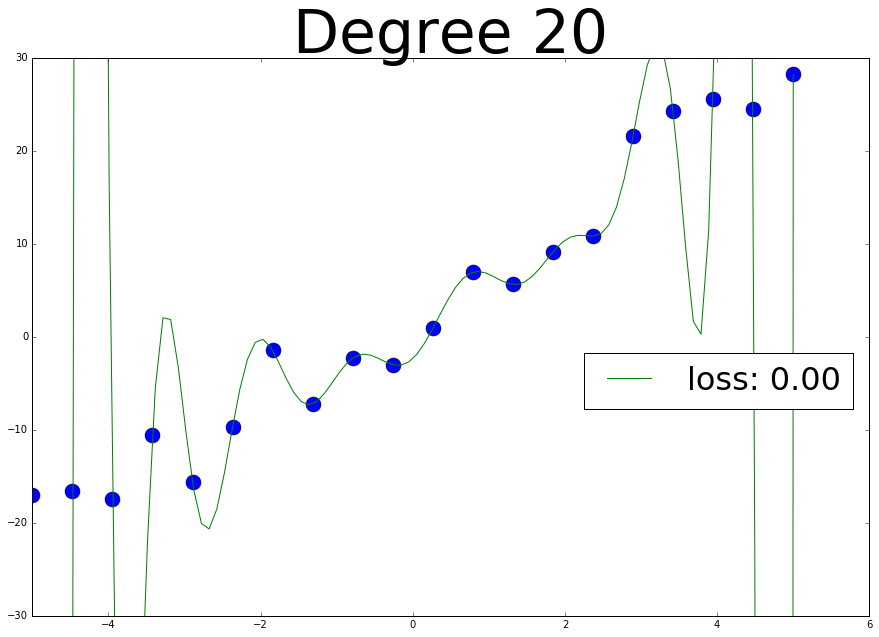

In [53]:
label20 = "loss: %.2f"%norm(y-p20(x))
plot(x, y, 'o', markersize=15);
plot(x0, p20(x0), label=label20);
plt.axis([-5, 6, -30, 30])
norm(y-p20(x))
title("Degree 20", fontsize=60)
legend(bbox_to_anchor=(1, 0.5), fontsize=32);
savefig("p20.png")

### Polynomial fit
<div class='zoom_img' style="width: 100%">
<br/>
<img src='p1.png' width=480 style="margin-left: 150px" />
<img src='p2.png' width=480 style="margin-left: 150px" />
<div style="clear: both"></div>
<img src='p5.png' width=480 style="margin-left: 150px" />
<img src='p20.png' width=480 style="margin-left: 150px" />
</div>


## Test

In [59]:
x2 =linspace(-5,5,25)
error2 = random.rand(x2.shape[0])*10-5
y2 = 5*x2+3+error2
label20 = "loss: %.2f"%norm(y2-p20(x2))
label1 = "loss: %.2f"%norm(y2-p1(x2))

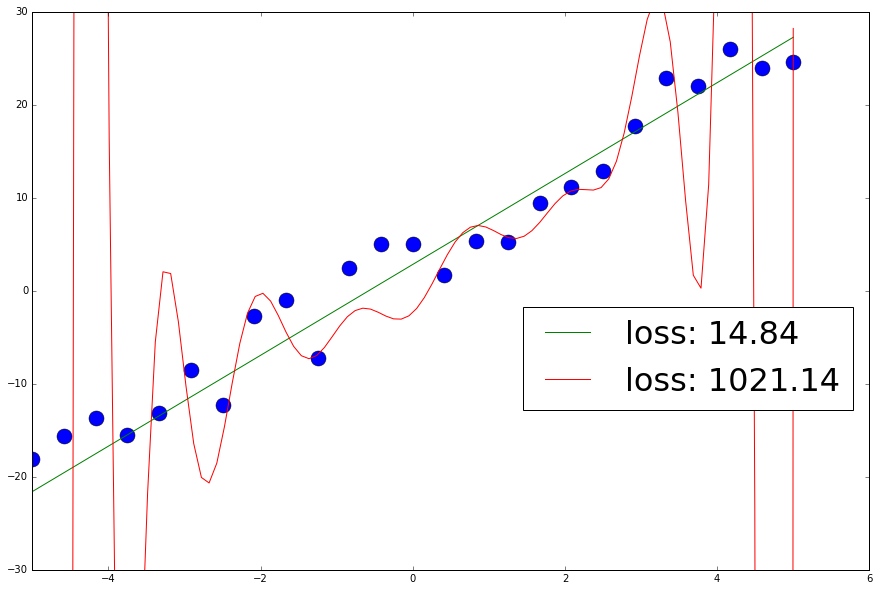

In [63]:
plot(x2,y2, 'o', markersize=15);plot(x0, p1(x0), label=label1);plot(x0, p20(x0), label=label20);plt.axis([-5, 6, -30, 30])
legend(bbox_to_anchor=(1, 0.5), fontsize=32);

# Dropout


> The more constraints one imposes, the more one frees one’s self… 


> the arbitrariness of the constraint serves only to obtain precision of execution.  


>  --Igor Stravinsky

# The 10,000 Hour Rule
> “The master has failed more times than the beginner has even tried.”


> --Stephen McCranie

# Learning is all about generalization
> All generalizations are false, including this one.



> --Mark Twain

# Making Mistakes is essential
> I will close my door to shut out all possible errors. 


> “But how am I to enter in?” cried Truth. 


> --Tagore


# You cannot learn from textbook
> “We learn from failure, not from success!” 



>  --Bram Stoker, Dracula 

# Reinforcement Learning

> Education is learning what you didn't even know you didn't know. 


> --Daniel J. Boorstin

# Exploration
# vs. 
# Exploitation

In [136]:
def learner(ϵ=0, n=10):
    p = rand(n)*10   
    t = ones(n)
    while 1:
        #print("learner", p)
        if rand() < ϵ:
            a = randint(n)
        else:
            a = argmax(p)
        reward = yield a
        t[a]+=1
        p[a] = p[a]+(reward-p[a])/t[a]

def bandit(n=10):
    p = rand(n)*10
    #print("bandit", p)
    a = -1
    while 1:
        if a == -1:
            a = yield p
        else:            
            a = yield random.normal(p[a])

In [160]:
N=5000
M=2000
result1=zeros(N)
result2=zeros(N)
result3=zeros(N)
for j in range(M):    
    b = bandit()
    p = next(b)
    
    l = learner(.1)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result1[i]+=reward #total/(i+1)/p.max()
        
    l = learner(.01)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result2[i]+= reward #total/(i+1)/p.max()
        
    l = learner(0)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result3[i]+= reward #total/(i+1)/p.max()

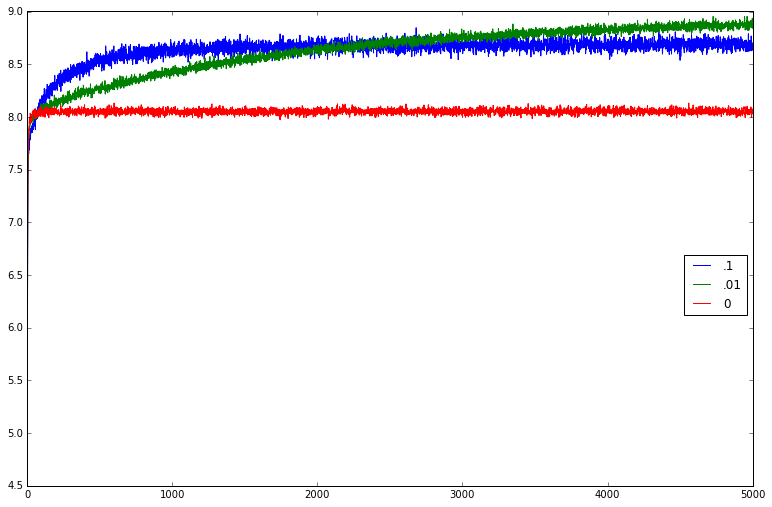

In [161]:
figure(figsize=(13,8.5));
plot(result1/M, label=".1");plot(result2/M, label=".01");plot(result3/M, label="0");
plt.legend(bbox_to_anchor=(1, 0.5));
savefig("rl2.png")

<img src="rl.png"  width="85%" />
> “Have no fear of perfection - you'll never reach it.” --Salvador Dalí

<img src="rl2.png"  width="85%" />

#  Q&A

> “Freedom is not worth having if it does not include the freedom to make mistakes.” 


> --Mahatma Gandhi

* 萬事萬物都有缺口， 缺口就是光的入口 -Leonard Cohen
* 我們都千瘡百孔，所以光才找得到入口 - 海明威
* 我緊閉門扉把錯誤擋在外，真理高呼：「那我如何進得來？」 -泰戈爾
* 大師失敗的次數比新手嘗試的次數還多 -Stephen McCranie
* 犯錯就是真理之門 -James Joyce
* 要等到能做到無可挑剔時才開始，那只能一事無成. -Cardinal Newman
* 成功之路無完工之時 -Lily Tomlin
* 一日無過可改，即一日無步可進 -了凡四訓
* 一個人從不犯錯是因為他不嘗試新事物。 -愛因斯坦